<a href="https://colab.research.google.com/github/Tafara-Moyo/Dissertation-/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code below will likely give you a warning after it installs -- no worries, just restart your session and move on to the second code chunk!

In [ ]:
! pip install opencv-python
! pip install imageAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 866.3 kB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/cv_models")
os.listdir()

['output', 'input', 'models']

In [ ]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()

# You can find all of the model object at the following site:
# https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Classification/README.md

# Your goal is find some images to play with!

model_path = "./models/tiny-yolov3.pt"
#model_path = "./models/yolov3.pt"
#model_path = "./models/retinanet_resnet50_fpn_coco-eeacb38b.pt" # Can be weird!
input_path = "./input/happy_people.jpg"
output_path = "./output/happy_people_label.jpg"

detector.setModelTypeAsTinyYOLOv3()
#detector.setModelTypeAsYOLOv3()
#detector.setModelTypeAsRetinaNet() # Can be weird!
detector.setModelPath(model_path)
detector.loadModel()

detections, extracted_objects = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path,
                                                                extract_detected_objects=True, minimum_percentage_probability=10)

for eachItem in detections:
    print(eachItem["name"] , " : ", eachItem["percentage_probability"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-ab41c31c25b9>", line 19, in <cell line: 19>
    detector.setModelPath(model_path)
  File "/usr/local/lib/python3.10/dist-packages/imageai/Detection/__init__.py", line 210, in setModelPath
    raise ValueError(
ValueError: invalid path, path not pointing to a valid file.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", lin

In [ ]:
extracted_objects

['./output/happy_people_label-extracted/happy_people_label-1.jpg',
 './output/happy_people_label-extracted/happy_people_label-2.jpg',
 './output/happy_people_label-extracted/happy_people_label-3.jpg',
 './output/happy_people_label-extracted/happy_people_label-4.jpg',
 './output/happy_people_label-extracted/happy_people_label-5.jpg']

In [ ]:
detections

[{'name': 'person',
  'percentage_probability': 99.99,
  'box_points': [117, 60, 164, 182]},
 {'name': 'person',
  'percentage_probability': 99.98,
  'box_points': [62, 54, 116, 186]},
 {'name': 'person',
  'percentage_probability': 99.91,
  'box_points': [180, 41, 235, 184]},
 {'name': 'person',
  'percentage_probability': 99.92,
  'box_points': [153, 53, 192, 186]},
 {'name': 'person',
  'percentage_probability': 99.65,
  'box_points': [2, 37, 56, 187]}]

In [ ]:
# All the models are here: https://keras.io/api/applications/#usage-examples-for-image-classification-models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = "./input/stroke_sim.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top = 10)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02916936', 'bulletproof_vest', 0.3668601), ('n03617480', 'kimono', 0.20677033), ('n02895154', 'breastplate', 0.13344139), ('n03146219', 'cuirass', 0.040743925), ('n02769748', 'backpack', 0.023006141), ('n02749479', 'assault_rifle', 0.021807726), ('n03868863', 'oxygen_mask', 0.014096942), ('n03000247', 'chain_mail', 0.013372318), ('n04229816', 'ski_mask', 0.012200241), ('n03763968', 'military_uniform', 0.011575818)]


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [5, 10]
pyplot.rcParams['figure.dpi'] = 200
from numpy import expand_dims

model = VGG19()

ixs = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in ixs]

model = Model(inputs = model.inputs, outputs = outputs)

img_path = "./input/stroke_sim.jpg"

img = load_img(img_path, target_size = [224, 224])

img = img_to_array(img)

img = expand_dims(img, axis = 0)

img = preprocess_input(img)

feature_maps = model.predict(img)

1/1 [==============================] - 1s 682ms/step


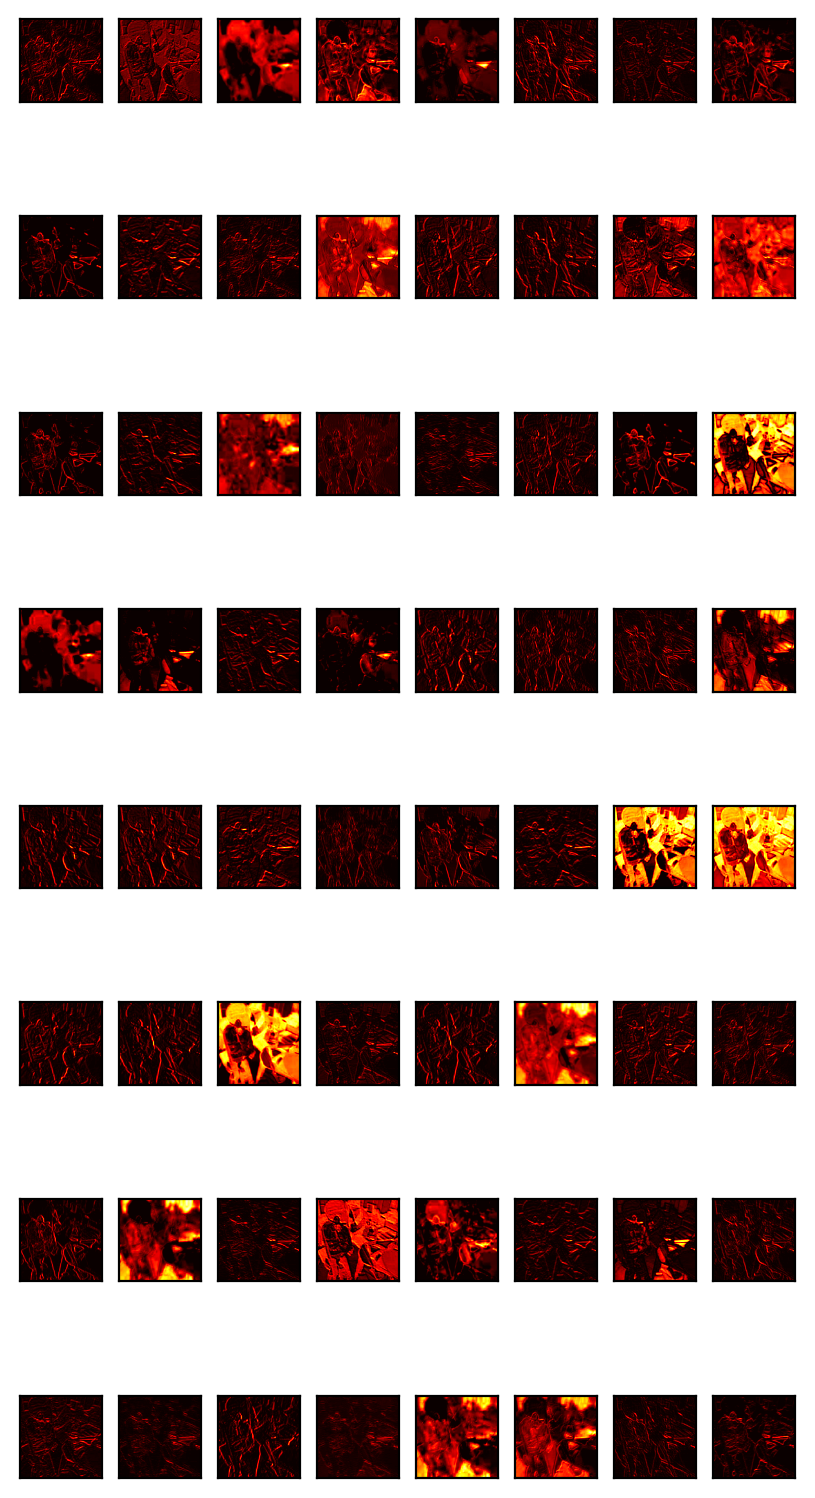

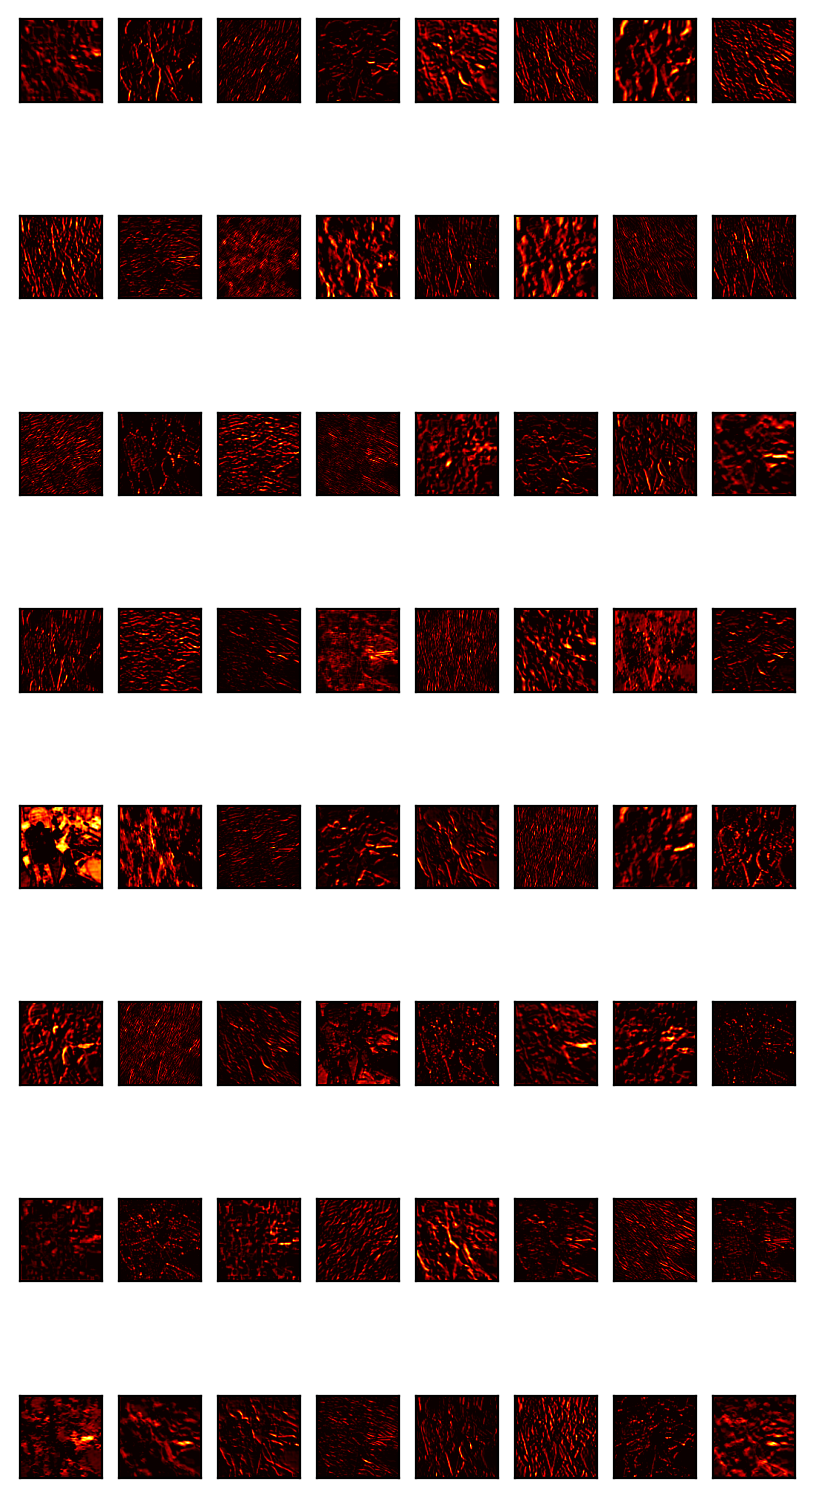

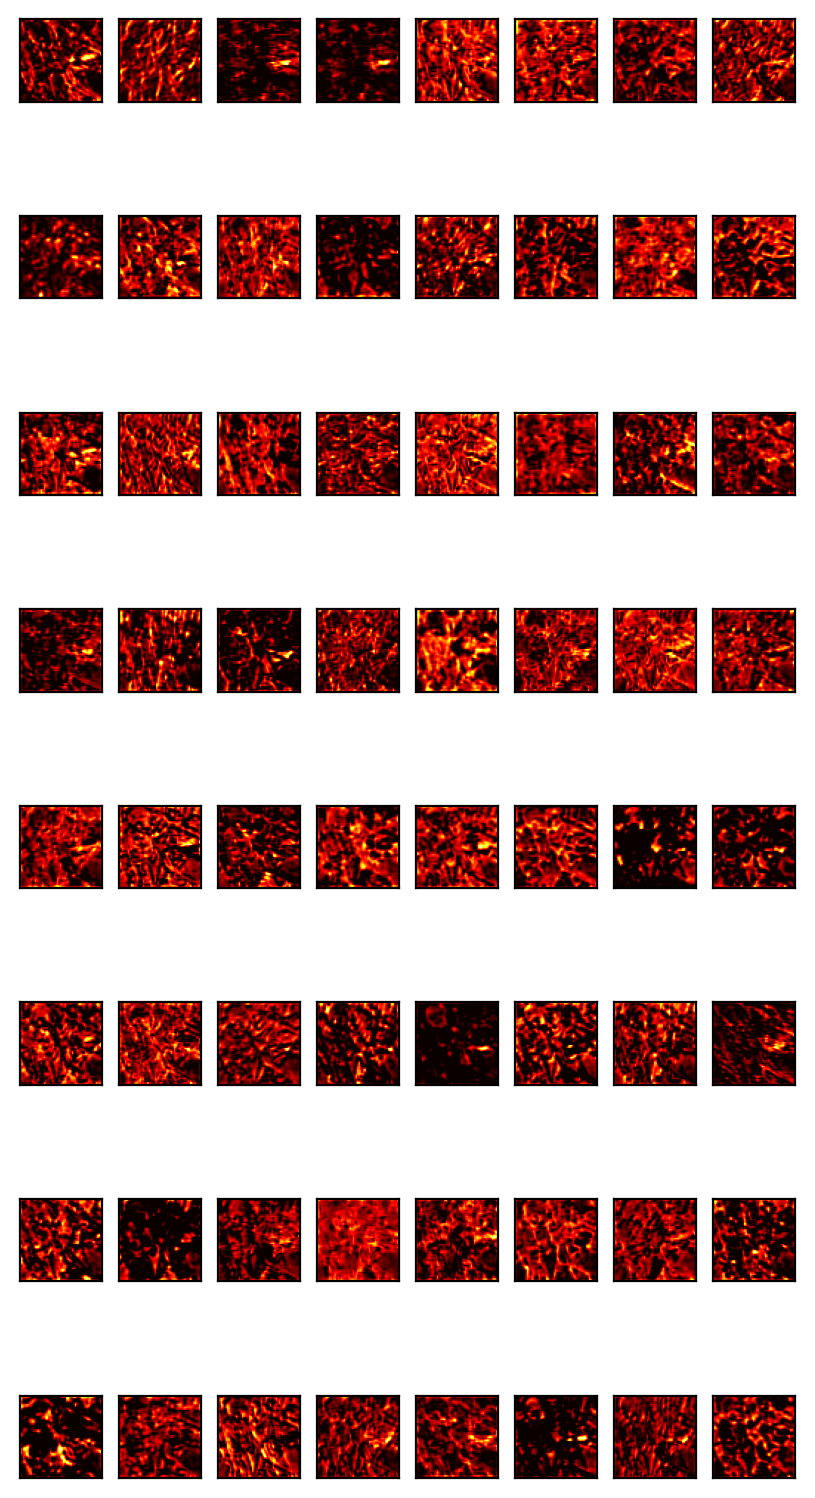

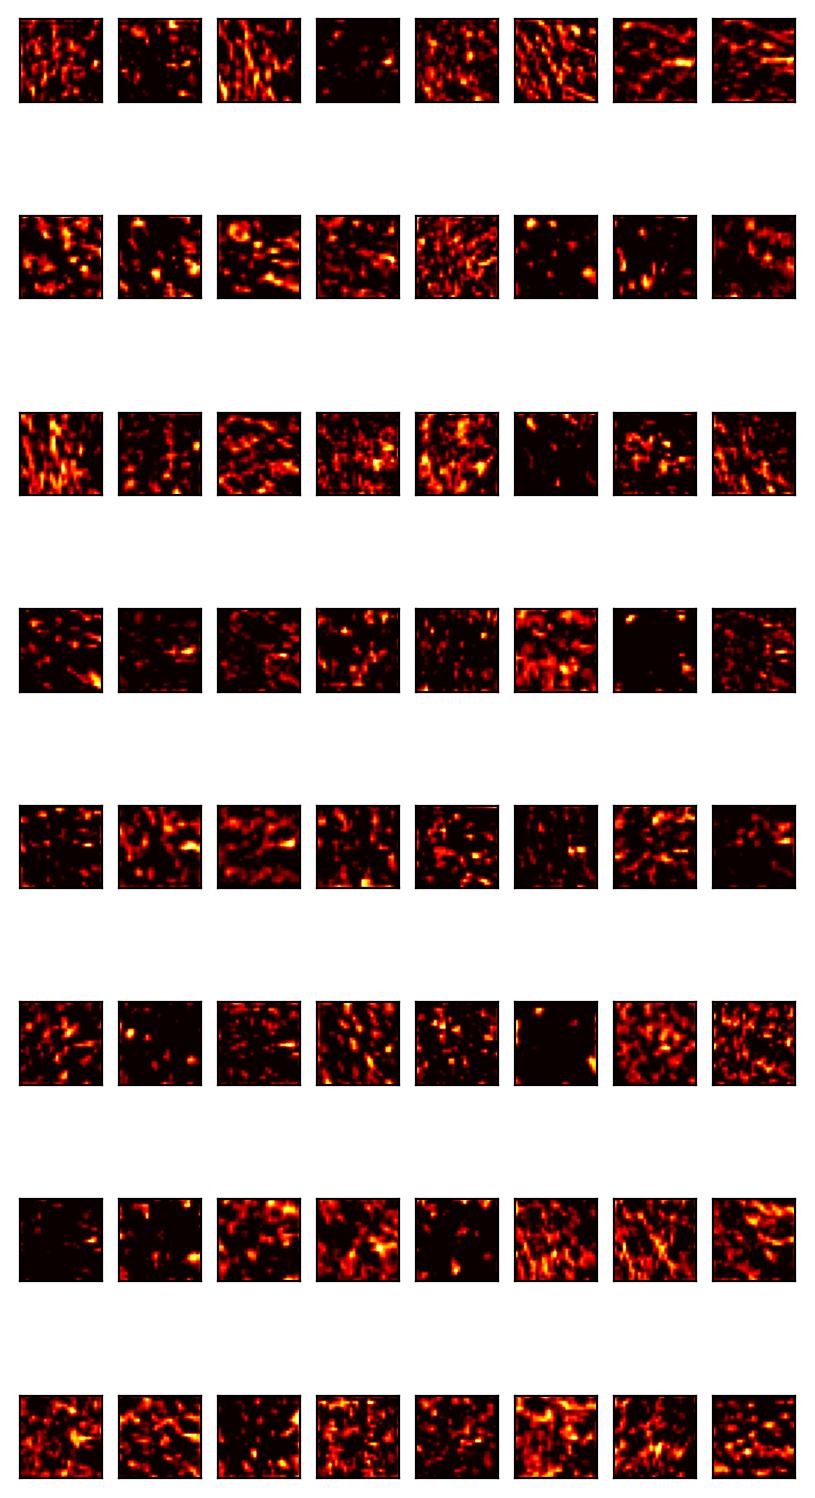

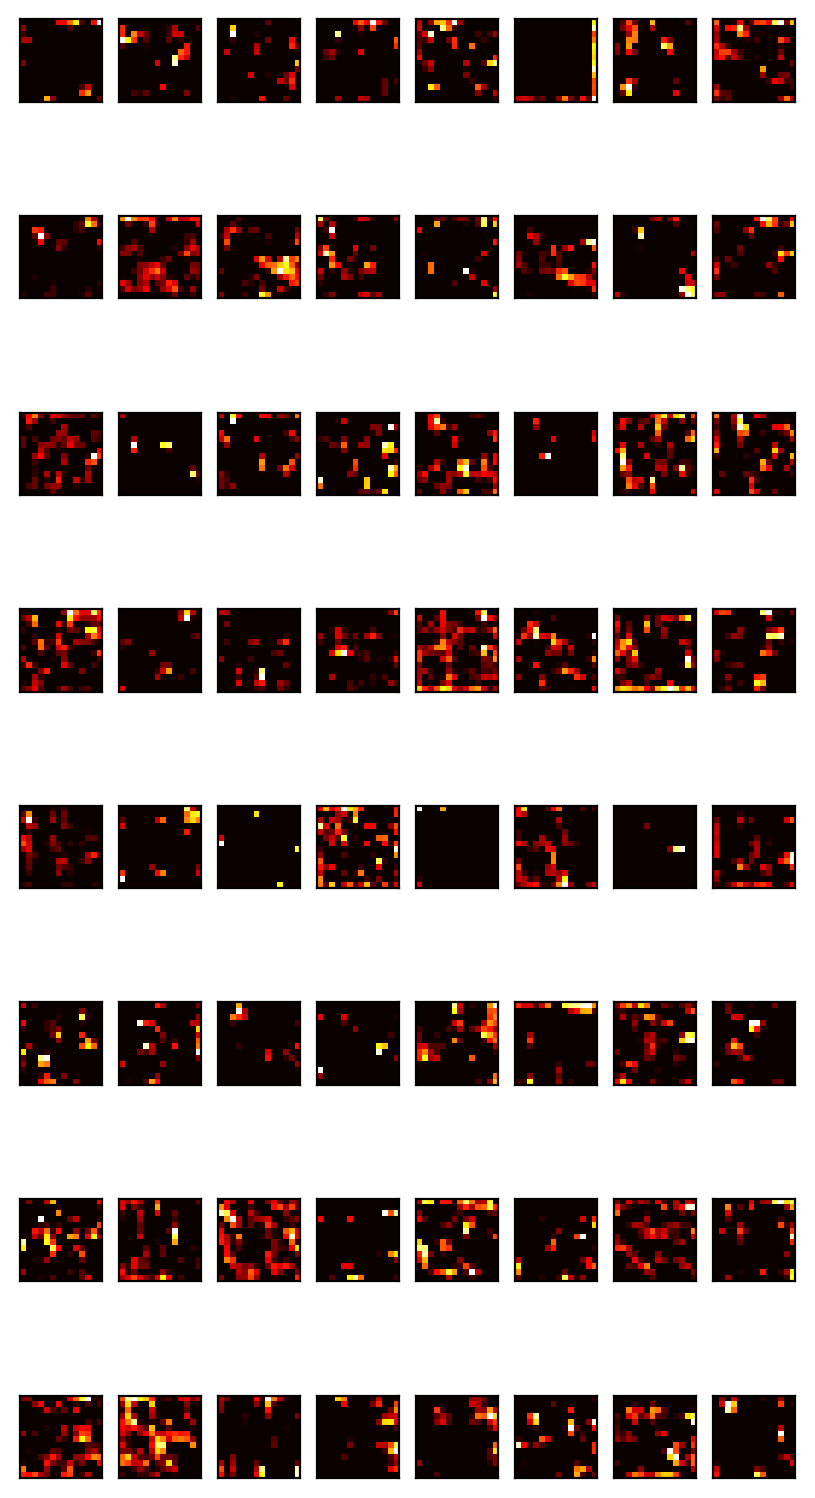

In [ ]:
square = 8

for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
          ax = pyplot.subplot(square, square, ix)
          ax.set_xticks([])
          ax.set_yticks([])
          pyplot.imshow(fmap[0, :, :, ix-1], cmap = 'hot')
          ix += 1
    pyplot.show()